# Turrapport
> Backcountry ski

- toc: False 
- badges: False
- comments: true
- categories: [backcountry ski]
- image: images/chart-preview.png

In [1]:
# hide
import stravaio
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Image, HTML

In [3]:
#hide
act = client.get_activity_by_id(4559817993).to_dict()
stream = client.get_activity_streams(id=4559817993, athlete_id=10774751)#.to_dict()
stream = pd.DataFrame(stream.to_dict())
stream['latlng'] = list(zip(stream.lat.values, stream.lng.values))

In [4]:
#hide_input
display(Markdown(f"""
# {act['name']}
### {act['type']} <br>
Total Distance: {round(act['distance']/1000,1)} km <br>
Moving Time: {np.round(act['distance']/60/60, 1)} hours <br>
Elevation Gain: {int(np.round(act['total_elevation_gain'], 0))} meters
"""))


# Lammanipa, oksli og +1 drone
### BackcountrySki <br>
Total Distance: 9.0 km <br>
Moving Time: 2.5 hours <br>
Elevation Gain: 1384 meters


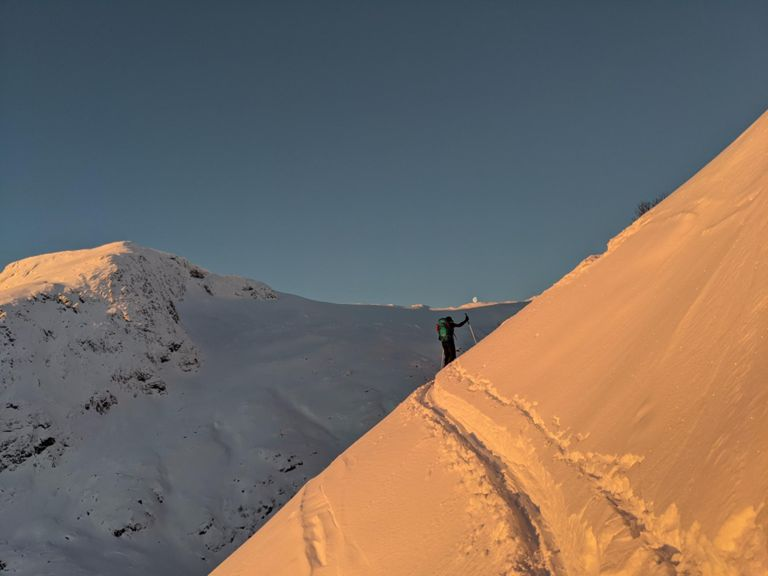

In [5]:
#hide_input
Image(act['photos']['primary']['urls']['600'])

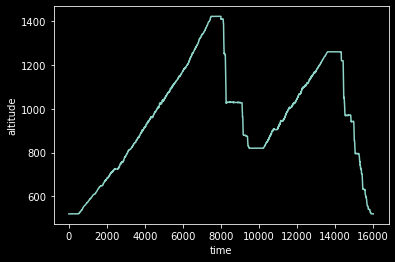

In [6]:
# hide_input
_ = sns.lineplot(x="time",y="altitude",data=stream)

In [7]:
#hide_input
import plotly.express as px
fig = px.line_mapbox(stream, lat="lat", lon="lng",  zoom=12, height=300)
fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=12,
    margin={"r":0,"t":0,"l":0,"b":0})

fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "statkart.no",
            "source": [
        'http://opencache.statkart.no/gatekeeper/gk/gk.open_gmaps?'
        'layers=topo4&zoom={z}&x={x}&y={y}'],
        },
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


fig.show()
#display(HTML((fig.to_html())))